<a href="https://colab.research.google.com/github/amrutask/Machine_Learning/blob/master/HomeWork1/Problem4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.


Training data shape:  (60000, 784)
Test data shape (10000, 784)
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 1s 21us/step - loss: 1.2715 - acc: 0.6994 - val_loss: 0.8190 - val_acc: 0.8279
Epoch 2/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.7199 - acc: 0.8386 - val_loss: 0.6117 - val_acc: 0.8596
Epoch 3/50
60000/60000 [==============================] - 1s 19us/step - loss: 0.5891 - acc: 0.8595 - val_loss: 0.5280 - val_acc: 0.8753
Epoch 4/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.5264 - acc: 0.8689 - val_loss: 0.4813 - val_acc: 0.8817
Epoch 5/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.4883 - acc: 0.8759 - val_loss: 0.4511 - val_acc: 0.8854
Epoch 6/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.

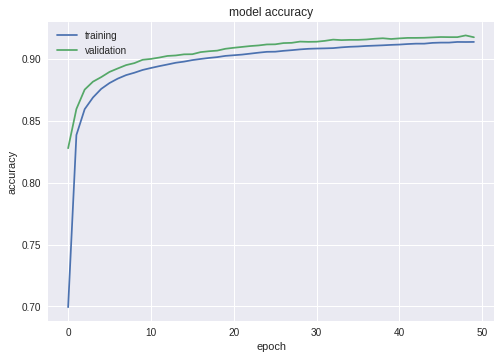

In [1]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Flatten the images
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)

x_train=x_train/255 
x_test=x_test/255

print("Training data shape: ", x_train.shape) 
print("Test data shape", x_test.shape) 

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

image_size = 784
batch_size = 128 
epochs = 50

model = Sequential()
model.add(Dense(num_classes, input_dim=image_size, activation='softmax')) 

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy']) 
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,verbose=1, validation_data=(x_test, y_test)) 
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()
